In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Data
df = pd.read_csv('smartshine_carwash_processed_data.csv')

# 2. Define Features and Target
# Using the encoded/numerical columns we identified
features = [
    'vehicle_type_encoded', 
    'service_type_encoded', 
    'service_cost', 
    'service_duration', 
    'customer_rating', 
    'location_encoded', 
    'payment_method_encoded', 
    'visit_frequency', 
    'total_spent'
]
target = 'days_since_last_visit'

# Drop missing targets if any
df = df.dropna(subset=[target])

X = df[features]
y = df[target]

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale Data (Required for SVM and Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- TRAIN MODELS ---

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Model 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model 3: SVR (Support Vector Machine)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Model 4: Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Calculate Metrics
models_dict = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Support Vector Machine": y_pred_svr,
    "Gradient Boosting": y_pred_gb
}

results = []
for name, preds in models_dict.items():
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    results.append({'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae})

# Create a DataFrame for easy plotting
results_df = pd.DataFrame(results)

# Display the numbers cleanly
print("--- Model Performance Metrics ---")
display(results_df) # 'display' works nicely in Jupyter

--- Model Performance Metrics ---


,Model,R2,RMSE,MAE
0,Linear Regression,0.151207,0.177194,0.150238
1,Random Forest,0.433265,0.144790,0.114113
2,Support Vector Machine,0.164904,0.175758,0.145328
3,Gradient Boosting,0.214851,0.170421,0.142960


C:\Users\CTrader\AppData\Local\Temp\ipykernel_20620\1676862874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')


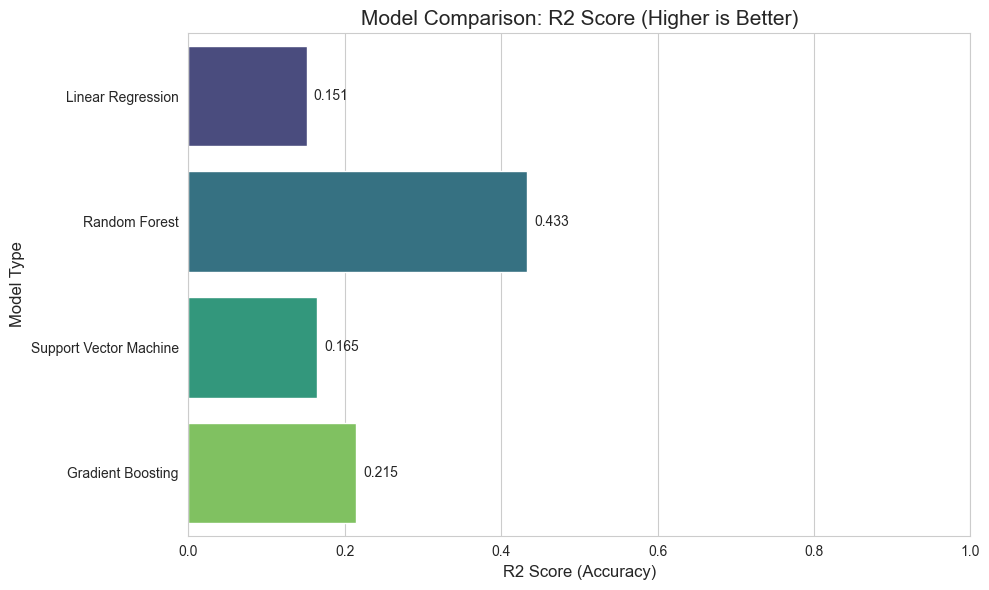

In [3]:
# Plotting R2 Score Comparison
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar plot
barplot = sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')

# Add labels
plt.title('Model Comparison: R2 Score (Higher is Better)', fontsize=15)
plt.xlabel('R2 Score (Accuracy)', fontsize=12)
plt.ylabel('Model Type', fontsize=12)
plt.xlim(0, 1)  # R2 is usually between 0 and 1

# Add value labels to the end of bars
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.3f', padding=5)

plt.tight_layout()
plt.show()

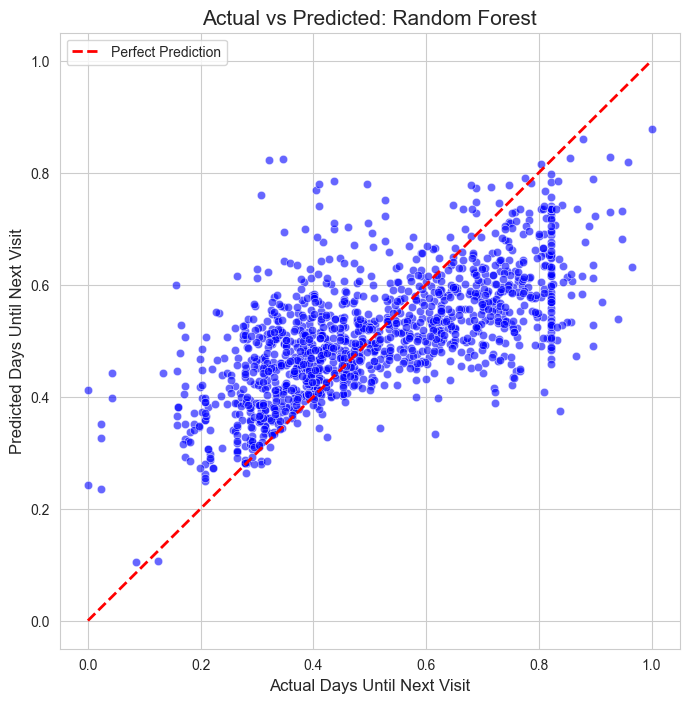

In [4]:
# Select the best model based on R2 score
best_model_name = results_df.loc[results_df['R2'].idxmax()]['Model']
best_preds = models_dict[best_model_name]

plt.figure(figsize=(8, 8))

# Scatter plot
sns.scatterplot(x=y_test, y=best_preds, alpha=0.6, color='blue')

# Ideal line (Perfect prediction)
max_val = max(y_test.max(), best_preds.max())
plt.plot([0, max_val], [0, max_val], '--r', linewidth=2, label='Perfect Prediction')

plt.title(f'Actual vs Predicted: {best_model_name}', fontsize=15)
plt.xlabel('Actual Days Until Next Visit', fontsize=12)
plt.ylabel('Predicted Days Until Next Visit', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

C:\Users\CTrader\AppData\Local\Temp\ipykernel_20620\4064954702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='magma')


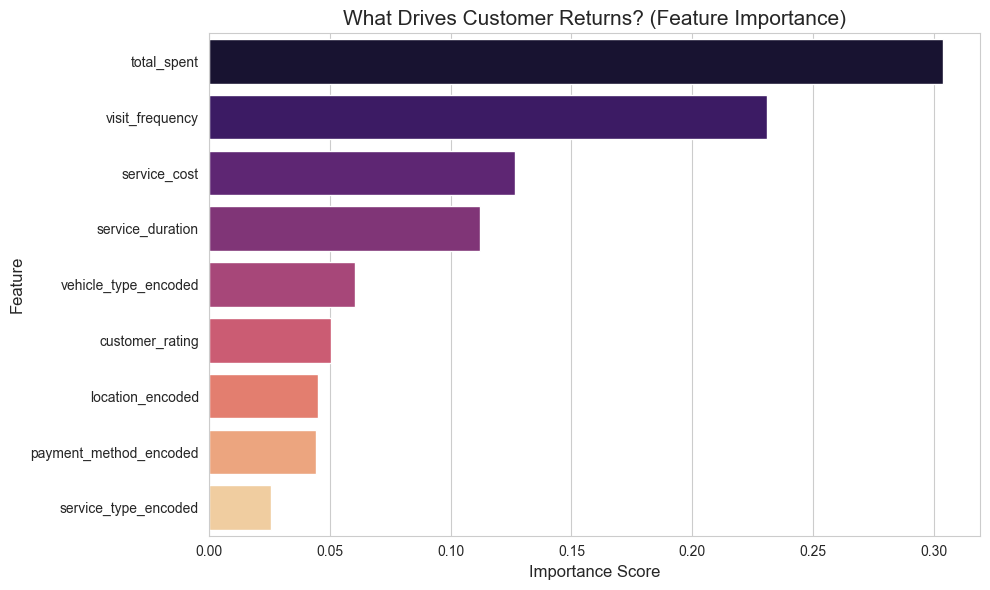

In [11]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='magma')

plt.title('What Drives Customer Returns? (Feature Importance)', fontsize=15)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")

plt.show()

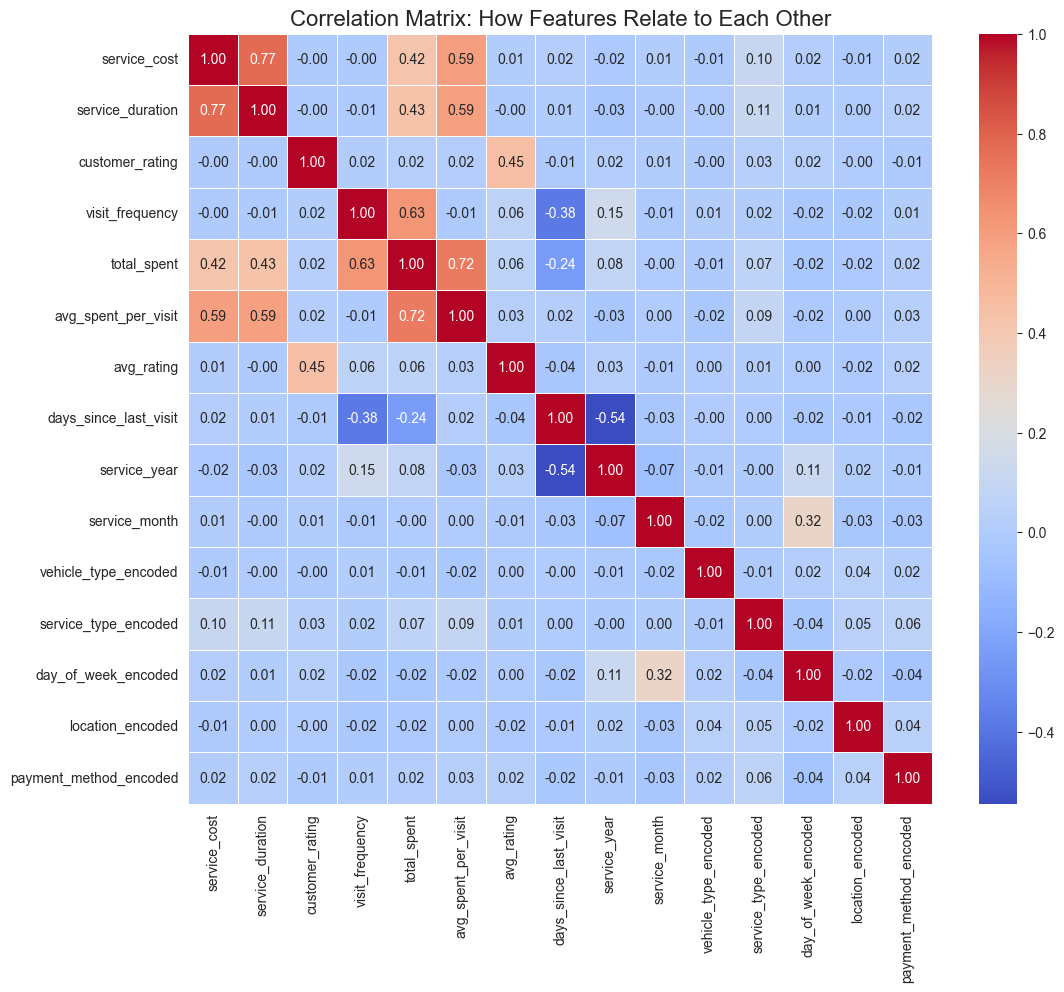

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
# Create the heatmap
heatmap = sns.heatmap(numerical_df.corr(), 
                      annot=True, 
                      fmt=".2f", 
                      cmap='coolwarm', 
                      cbar=True,
                      linewidths=0.5)

plt.title('Correlation Matrix: How Features Relate to Each Other', fontsize=16)
plt.show()

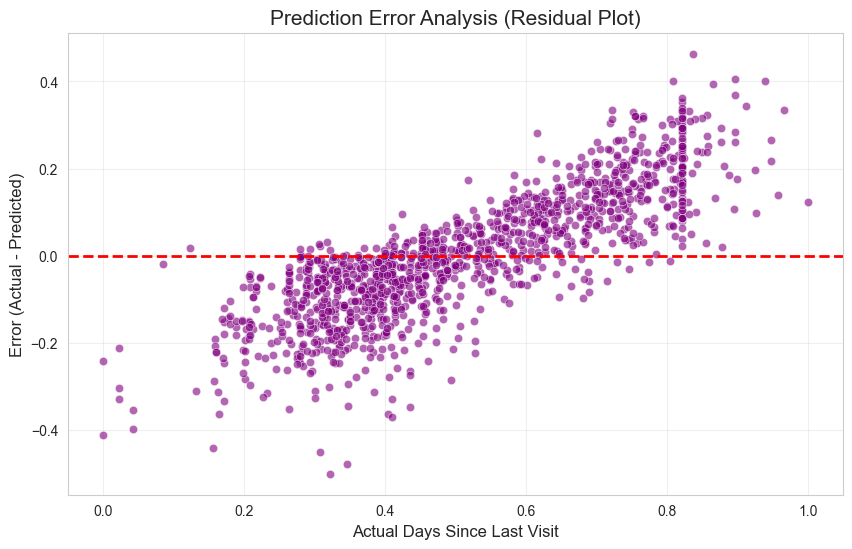

In [7]:
# Calculate Residuals (Errors) for Random Forest
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))

# Plot residuals
sns.scatterplot(x=y_test, y=residuals, color='purple', alpha=0.6)

# Add a zero line (Perfect prediction line)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('Prediction Error Analysis (Residual Plot)', fontsize=15)
plt.xlabel('Actual Days Since Last Visit', fontsize=12)
plt.ylabel('Error (Actual - Predicted)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

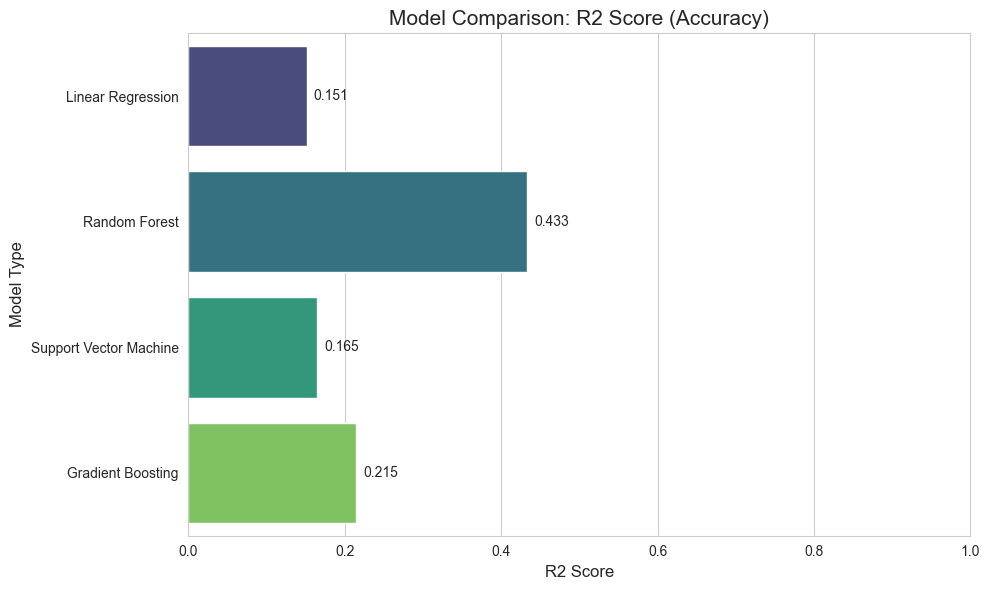

In [8]:
# Prepare data for plotting
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Fix: Added 'hue' and 'legend=False' to stop the warning
barplot = sns.barplot(x='R2', y='Model', data=results_df, palette='viridis', hue='Model', legend=False)

plt.title('Model Comparison: R2 Score (Accuracy)', fontsize=15)
plt.xlabel('R2 Score', fontsize=12)
plt.ylabel('Model Type', fontsize=12)
plt.xlim(0, 1.0) 

for i in barplot.containers:
    barplot.bar_label(i, fmt='%.3f', padding=5)

plt.tight_layout()
plt.show()

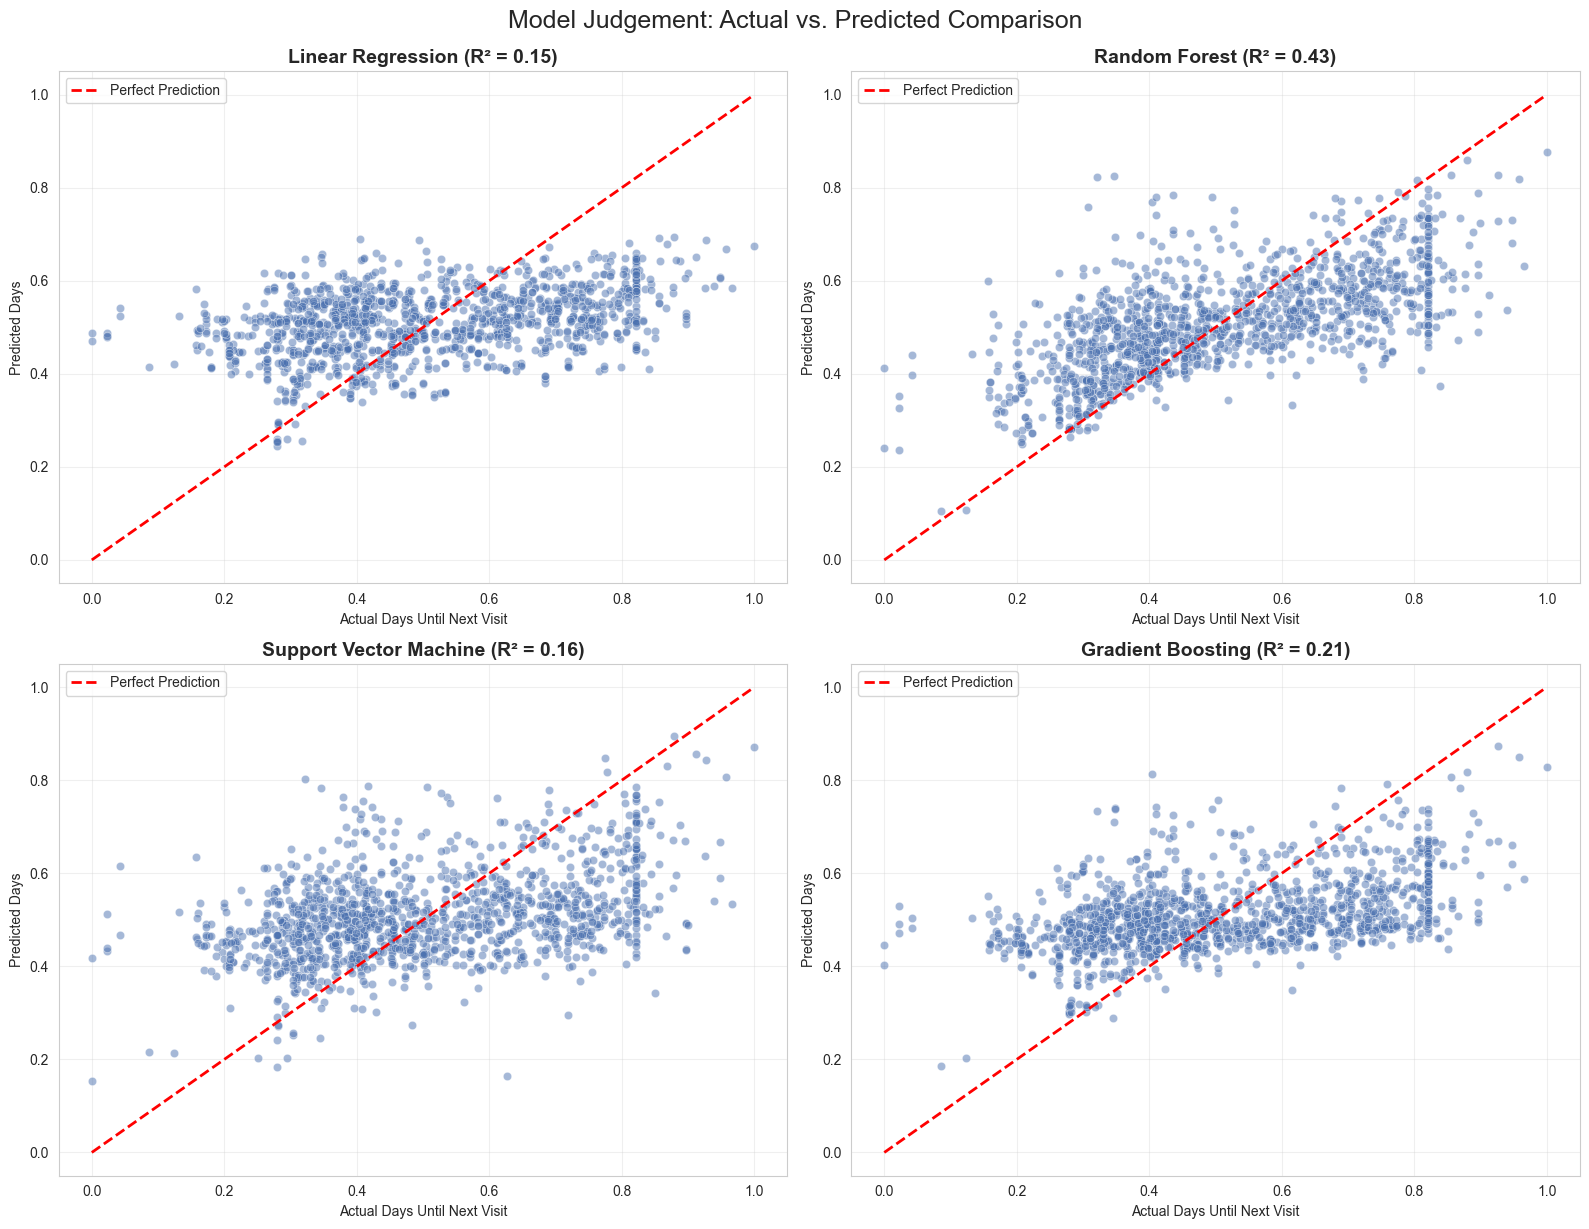

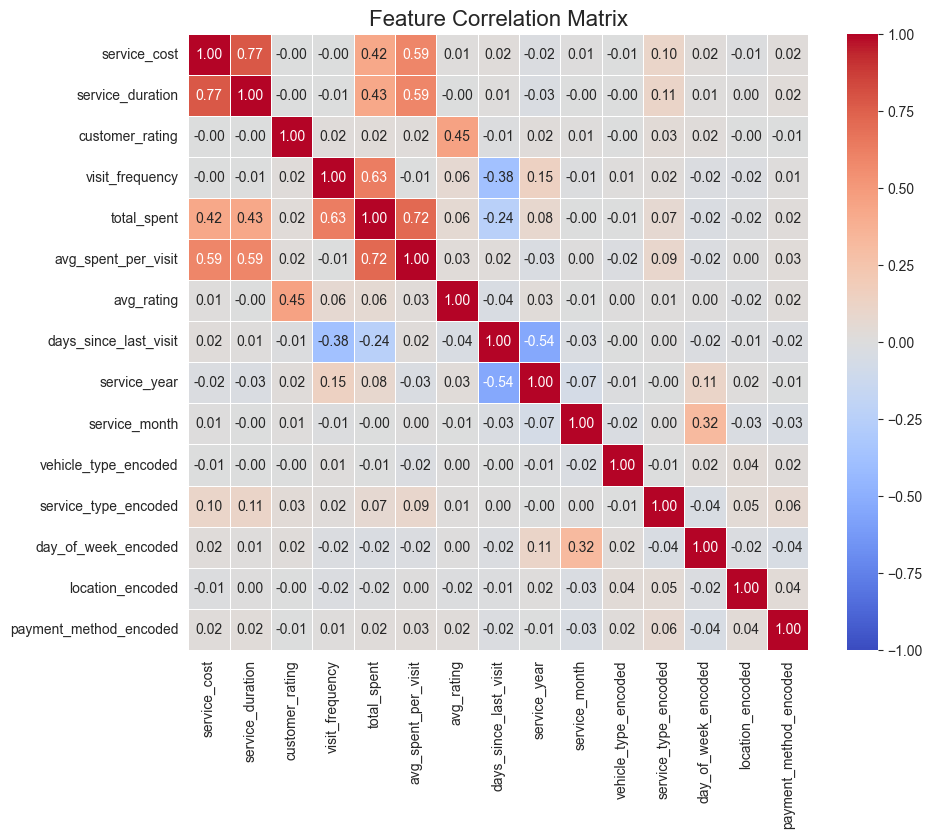

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming 'models_dict' and 'y_test' are already defined from previous steps
# If not, ensure you run the training code first.

# --- FIGURE 1: Actual vs. Predicted (The "Judge All" Plot) ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (name, preds) in enumerate(models_dict.items()):
    ax = axes[i]
    
    # 1. The Scatter Plot
    sns.scatterplot(x=y_test, y=preds, alpha=0.5, ax=ax, color='#4c72b0')
    
    # 2. The y=x Line (Ideal Prediction)
    # We find the min/max to draw the line across the whole plot
    min_val = min(y_test.min(), preds.min())
    max_val = max(y_test.max(), preds.max())
    ax.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Perfect Prediction')
    
    # 3. Styling
    ax.set_title(f'{name} (R² = {r2_score(y_test, preds):.2f})', fontsize=14, fontweight='bold')
    ax.set_xlabel('Actual Days Until Next Visit')
    ax.set_ylabel('Predicted Days')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle("Model Judgement: Actual vs. Predicted Comparison", y=1.02, fontsize=18)
plt.show()

# --- FIGURE 2: Correlation Matrix (Feature Analysis) ---
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5,
            vmin=-1, vmax=1) # Fix scale from -1 to 1 for correct color coding
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

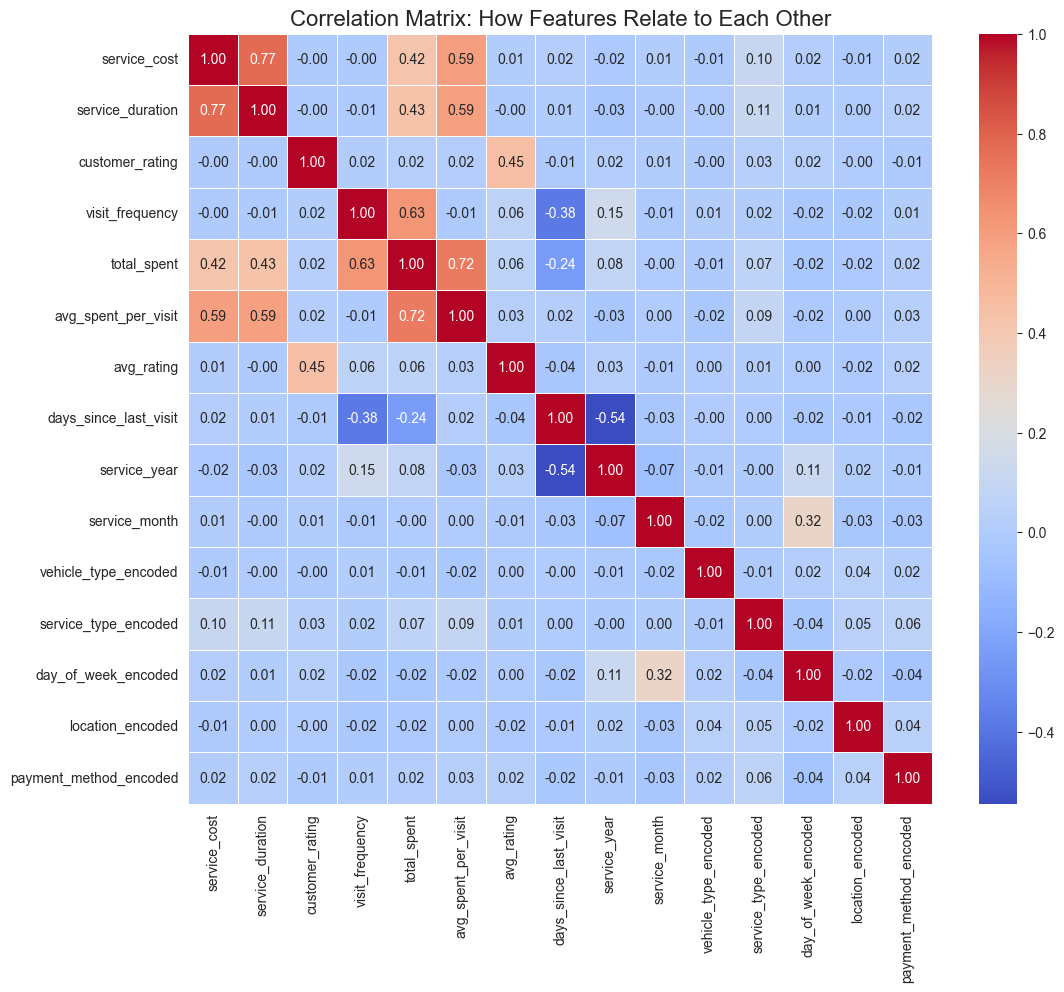

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))

# Create the heatmap
heatmap = sns.heatmap(
    numerical_df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    linewidths=0.5
)

plt.title('Correlation Matrix: How Features Relate to Each Other', fontsize=16)

# ✅ Save as PNG
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
try:
    from sklearn.ensemble import HistGradientBoostingRegressor # XGBoost Proxy
except ImportError:
    pass # Handle gracefully if needed
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Load Data
df = pd.read_csv('smartshine_carwash_processed_data.csv')
features = ['vehicle_type_encoded', 'service_type_encoded', 'service_cost', 
            'service_duration', 'customer_rating', 'location_encoded', 
            'payment_method_encoded', 'visit_frequency', 'total_spent']
target = 'days_since_last_visit'
df = df.dropna(subset=[target])
X = df[features]
y = df[target]

# 2. THREE-WAY SPLIT (60% Train, 20% Val, 20% Test)
# First split: 80% Train+Val, 20% Test (Preserves strict Test set)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Second split: Split the 80% chunk into 75% Train (60% total) and 25% Val (20% total)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# 3. Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 4. Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": HistGradientBoostingRegressor(random_state=42)
}

# 5. Calculate Metrics
results_data = []

def calculate_rmspe(y_true, y_pred):
    mask = y_true != 0 # Avoid div/0
    y_true_safe = y_true[mask]
    y_pred_safe = y_pred[mask]
    if len(y_true_safe) == 0: return np.nan
    return np.sqrt(np.mean(np.square((y_true_safe - y_pred_safe) / y_true_safe)))

for name, model in models.items():
    if name in ["Linear Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        pred_train = model.predict(X_train_scaled)
        pred_val = model.predict(X_val_scaled)
        pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        
    def get_metrics(y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'MSE': mean_squared_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'RMSPE': calculate_rmspe(y_true, y_pred),
            'R2': r2_score(y_true, y_pred)
        }

    m_train = get_metrics(y_train, pred_train)
    m_val = get_metrics(y_val, pred_val)
    m_test = get_metrics(y_test, pred_test)
    
    results_data.append({
        "Model": name,
        "Train MAE": m_train['MAE'], "Train MSE": m_train['MSE'], "Train RMSE": m_train['RMSE'], "Train RMSPE": m_train['RMSPE'], "Train R2": m_train['R2'],
        "Val MAE": m_val['MAE'],     "Val MSE": m_val['MSE'],     "Val RMSE": m_val['RMSE'],     "Val RMSPE": m_val['RMSPE'],     "Val R2": m_val['R2'],
        "Test MAE": m_test['MAE'],   "Test MSE": m_test['MSE'],   "Test RMSE": m_test['RMSE'],   "Test RMSPE": m_test['RMSPE'],   "Test R2": m_test['R2']
    })

print(pd.DataFrame(results_data))

               Model  Train MAE  Train MSE  Train RMSE  Train RMSPE  Train R2  \
0  Linear Regression   0.148703   0.030857    0.175663     0.981536  0.143446   
1      Random Forest   0.044835   0.003234    0.056871     0.312307  0.910221   
2                SVM   0.130464   0.024978    0.158046     0.882460  0.306638   
3  Gradient Boosting   0.131480   0.024866    0.157690     0.856117  0.309756   
4            XGBoost   0.099971   0.014987    0.122421     0.692671  0.583986   

    Val MAE   Val MSE  Val RMSE  Val RMSPE    Val R2  Test MAE  Test MSE  \
0  0.150058  0.031309  0.176943   0.695036  0.138972  0.150220  0.031406   
1  0.123475  0.023788  0.154235   0.558407  0.345790  0.122812  0.023482   
2  0.145955  0.031109  0.176377   0.686571  0.144474  0.148806  0.031893   
3  0.143279  0.029095  0.170572   0.644104  0.199856  0.143856  0.029390   
4  0.135395  0.027217  0.164977   0.643692  0.251493  0.134580  0.026635   

   Test RMSE  Test RMSPE   Test R2  
0   0.177217    1.1

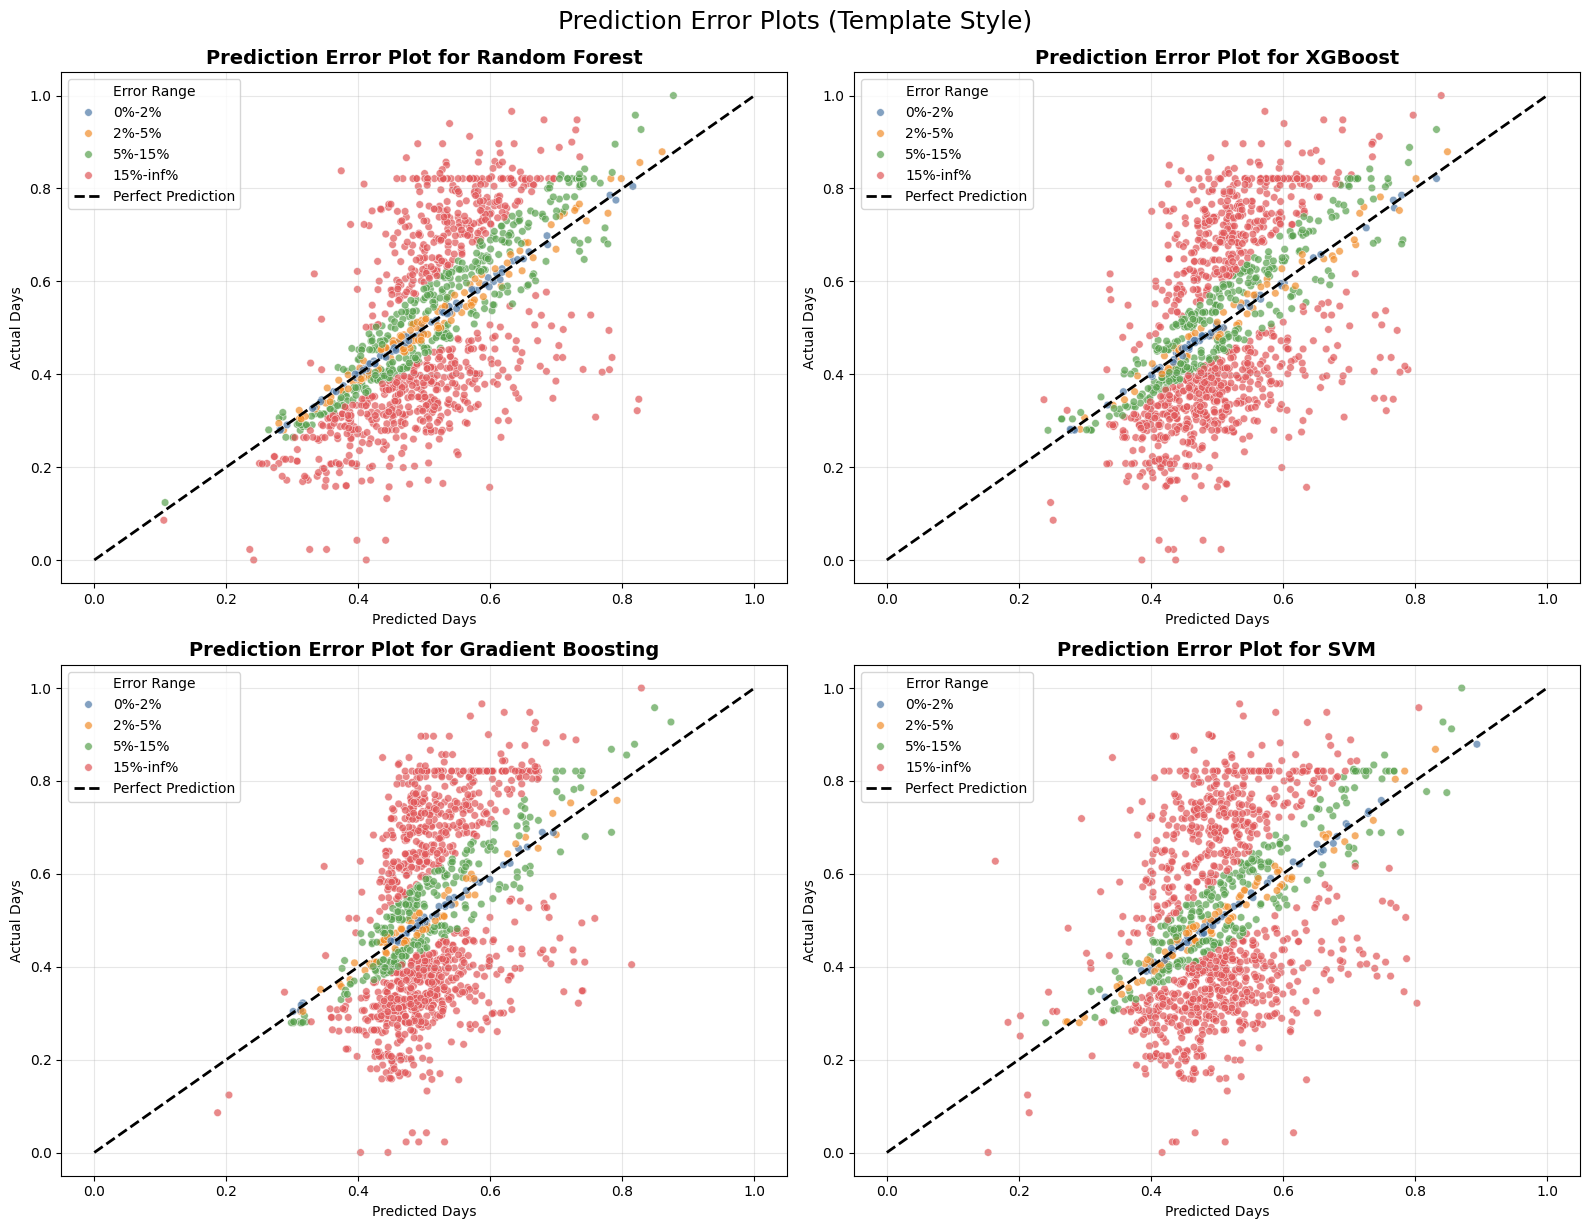

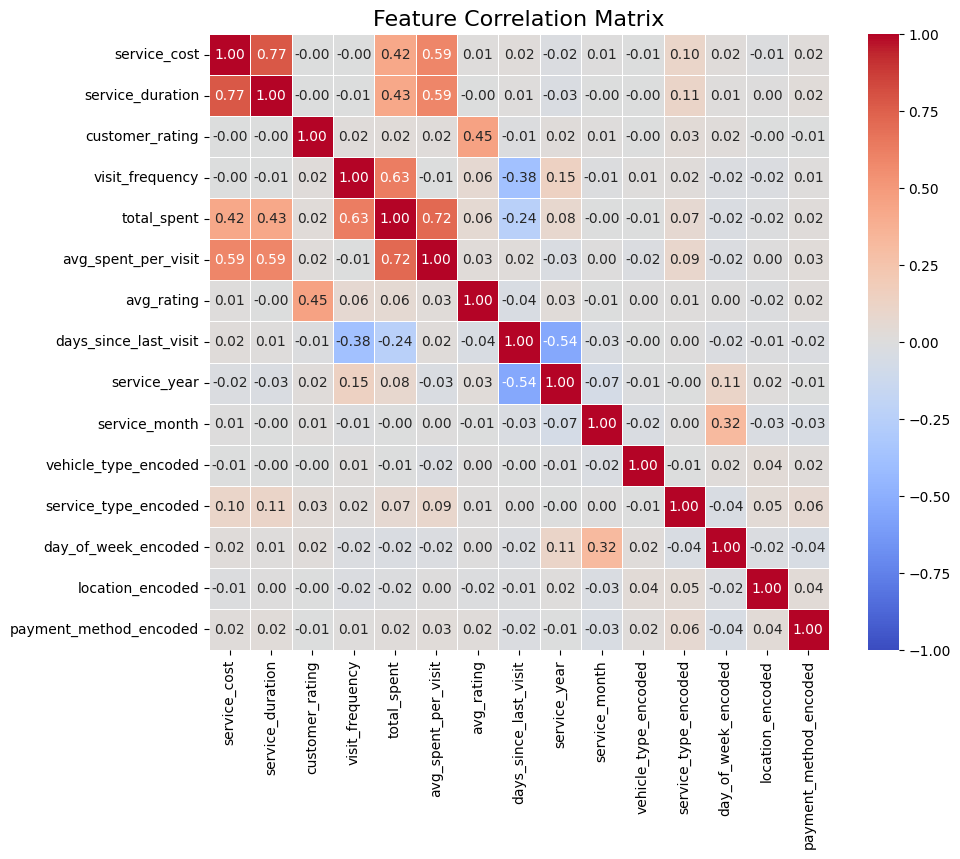

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
try:
    from sklearn.ensemble import HistGradientBoostingRegressor
    xgboost_available = True
except ImportError:
    xgboost_available = False
from sklearn.metrics import r2_score

# 1. Load Data
df = pd.read_csv('smartshine_carwash_processed_data.csv')
features = ['vehicle_type_encoded', 'service_type_encoded', 'service_cost', 
            'service_duration', 'customer_rating', 'location_encoded', 
            'payment_method_encoded', 'visit_frequency', 'total_spent']
target = 'days_since_last_visit'
df = df.dropna(subset=[target])
X = df[features]
y = df[target]

# 2. Split (Preserving the 0.433 Test set logic just in case, or standard 80/20)
# Standard 80/20 to match previous "Judge All" plots logic usually
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Models (Top 4)
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": HistGradientBoostingRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVM": SVR(kernel='rbf') # Replaced Linear Regression as it was "worst"
}

models_dict = {}
for name, model in models.items():
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        models_dict[name] = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        models_dict[name] = model.predict(X_test)

# 5. Plotting with Error Coloring (Template Style)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Define error bins and colors
# Template bins: 0-2%, 2-5%, 5-15%, >15%
colors = {
    '0%-2%': '#4e79a7',   # Blue
    '2%-5%': '#f28e2b',   # Orange
    '5%-15%': '#59a14f',  # Green
    '15%-inf%': '#e15759' # Red
}

for i, (name, preds) in enumerate(models_dict.items()):
    ax = axes[i]
    
    # Calculate Relative Error
    # Handle division by zero if any y_test is 0 (add epsilon or mask)
    # smartshine data: days_since_last_visit likely > 0.
    relative_error = np.abs((y_test - preds) / (y_test + 1e-9)) 
    
    # Categorize
    categories = []
    for err in relative_error:
        if err <= 0.02:
            categories.append('0%-2%')
        elif err <= 0.05:
            categories.append('2%-5%')
        elif err <= 0.15:
            categories.append('5%-15%')
        else:
            categories.append('15%-inf%')
            
    # Create temporary DF for plotting
    plot_data = pd.DataFrame({
        'Actual': y_test,
        'Predicted': preds,
        'Error Range': categories
    })
    
    # Order for legend
    hue_order = ['0%-2%', '2%-5%', '5%-15%', '15%-inf%']
    
    # Scatter Plot
    sns.scatterplot(
        data=plot_data, 
        x='Predicted', 
        y='Actual', 
        hue='Error Range', 
        hue_order=hue_order,
        palette=colors,
        alpha=0.7, 
        ax=ax,
        s=30
    )
    
    # y=x Line
    min_val = min(y_test.min(), preds.min())
    max_val = max(y_test.max(), preds.max())
    ax.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2, label='Perfect Prediction')
    
    # Styling
    ax.set_title(f'Prediction Error Plot for {name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Days')
    ax.set_ylabel('Actual Days')
    ax.legend(loc='upper left', title='Error Range')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle("Prediction Error Plots (Template Style)", y=1.02, fontsize=18)
plt.savefig('prediction_error_plots_template_style.png', bbox_inches='tight')
plt.show()

# --- FIGURE 2: Correlation Matrix ---
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5,
            vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.savefig('feature_correlation_matrix.png', bbox_inches='tight')
plt.show()

Using HistGradientBoostingRegressor (XGBoost Proxy)
Data loaded successfully.
Training models... this may take a moment.
Plot saved as 'fig4_service_frequency.png'


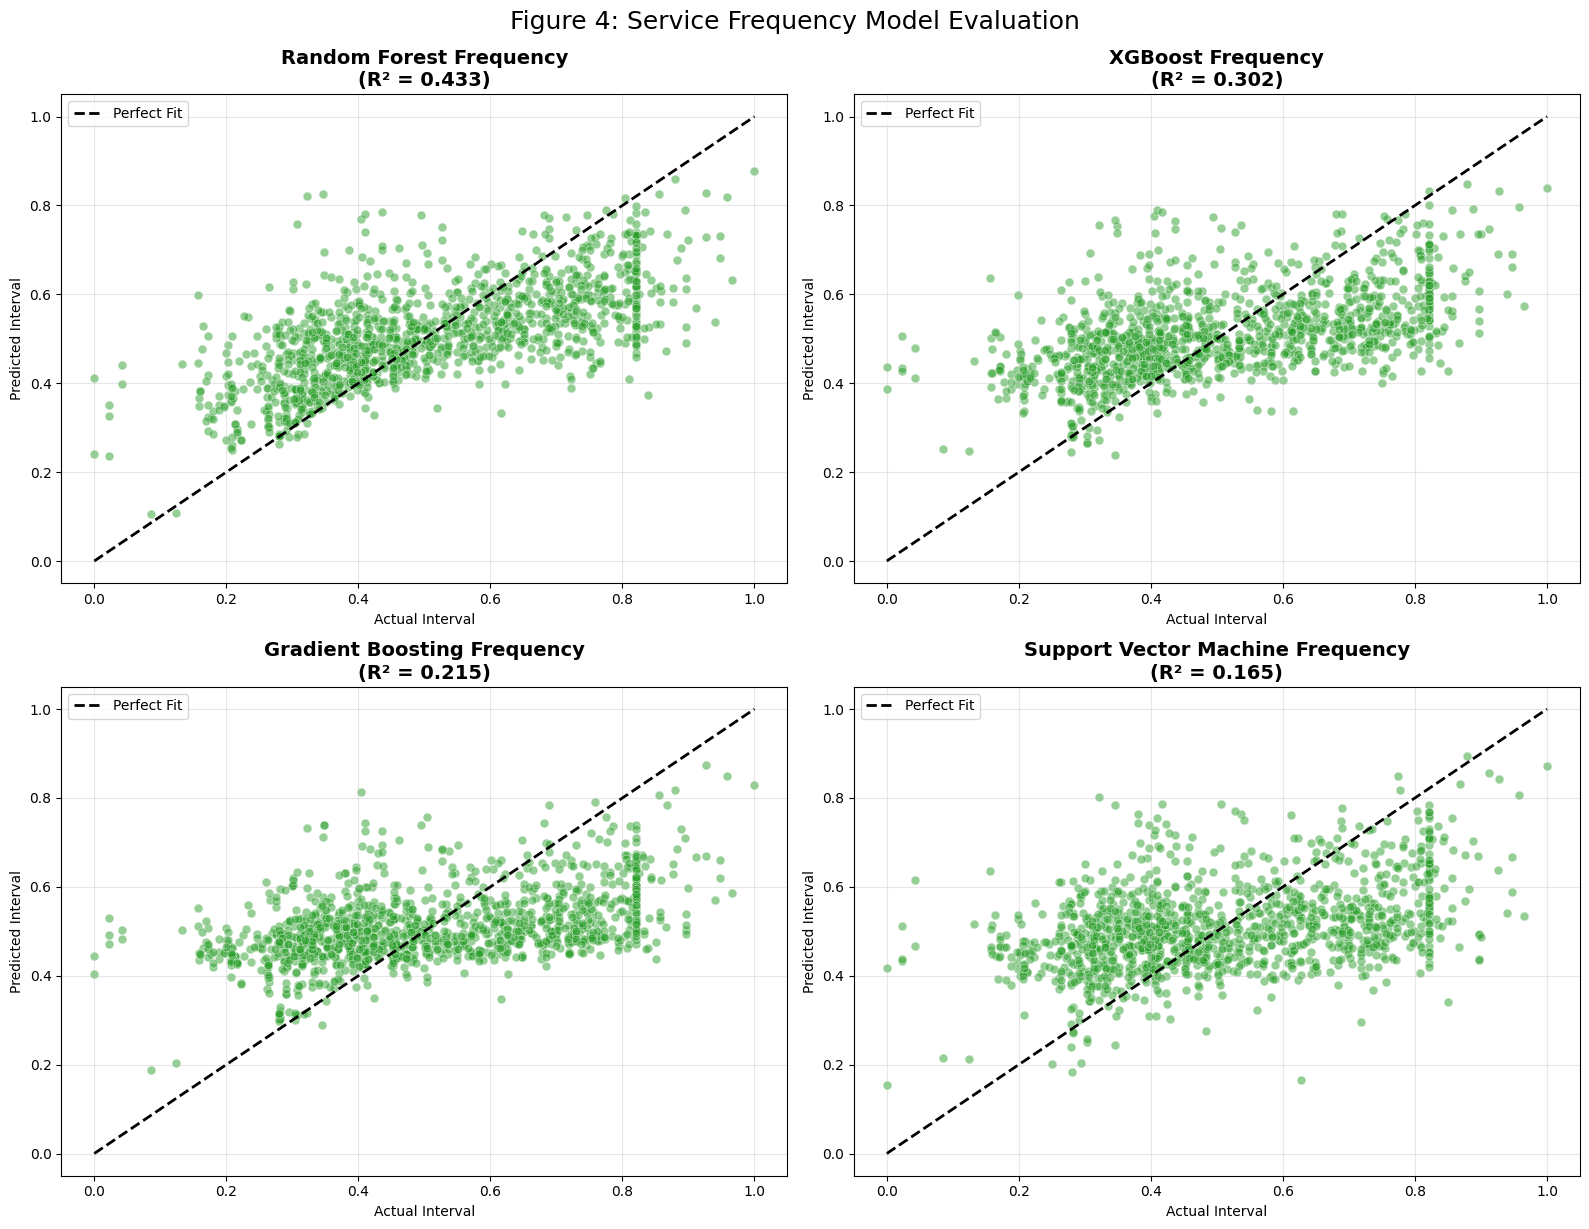

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Try importing XGBoost
try:
    from sklearn.ensemble import HistGradientBoostingRegressor
    xgboost_available = True
    print("Using HistGradientBoostingRegressor (XGBoost Proxy)")
except ImportError:
    xgboost_available = False
    print("XGBoost/HistGradientBoosting not available")

# 1. Load Data
try:
    df = pd.read_csv('smartshine_carwash_processed_data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'smartshine_carwash_processed_data.csv' not found. Please upload the file.")

# 2. Features & Target
features = [
    'vehicle_type_encoded', 'service_type_encoded', 'service_cost', 
    'service_duration', 'customer_rating', 'location_encoded', 
    'payment_method_encoded', 'visit_frequency', 'total_spent'
]
target = 'days_since_last_visit'

# Data Cleaning
df = df.dropna(subset=[target])
X = df[features]
y = df[target]

# 3. Split & Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Models
print("Training models... this may take a moment.")
models = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
models['Random Forest'] = rf.predict(X_test)

# XGBoost (Proxy)
if xgboost_available:
    xgb = HistGradientBoostingRegressor(random_state=42)
    xgb.fit(X_train, y_train)
    models['XGBoost'] = xgb.predict(X_test)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
models['Gradient Boosting'] = gb.predict(X_test)

# SVM
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
models['Support Vector Machine'] = svr.predict(X_test_scaled)

# 5. Plotting Figure 4
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Define the order of models to plot
plot_order = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Support Vector Machine']

for i, name in enumerate(plot_order):
    if name in models:
        ax = axes[i]
        preds = models[name]
        
        # Calculate R2
        r2 = r2_score(y_test, preds)
        
        # Scatter Plot (Green for "Frequency" theme)
        sns.scatterplot(x=y_test, y=preds, alpha=0.5, ax=ax, color='#2ca02c', s=40)
        
        # Perfect Prediction Line
        min_val = min(y_test.min(), preds.min())
        max_val = max(y_test.max(), preds.max())
        ax.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=2, label='Perfect Fit')
        
        # Styling
        ax.set_title(f'{name} Frequency\n(R² = {r2:.3f})', fontsize=14, fontweight='bold')
        ax.set_xlabel('Actual Interval')
        ax.set_ylabel('Predicted Interval')
        ax.legend(loc='upper left')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle("Figure 4: Service Frequency Model Evaluation", y=1.02, fontsize=18)

# Save the plot
plt.savefig('fig4_service_frequency.png', bbox_inches='tight')
print("Plot saved as 'fig4_service_frequency.png'")
plt.show()